In [15]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline, BarycentricInterpolator, CubicHermiteSpline
import sympy as sp
sp.init_printing()
import math as mt
import pandas as pd
import urllib.request

# Actividad 04: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Ross Anthony Miranda D'Angelo CC: 1034988497
*Métodos computacionales 2024-II*

---

# 1a
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},
Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.



In [ ]:
#Aqui va su código

<ipython-input-3-2d4f8fefb331>:20: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  error_expr = (f_deriv / np.math.factorial(n+1)) * np.prod([(x - xi) for xi in x_points])


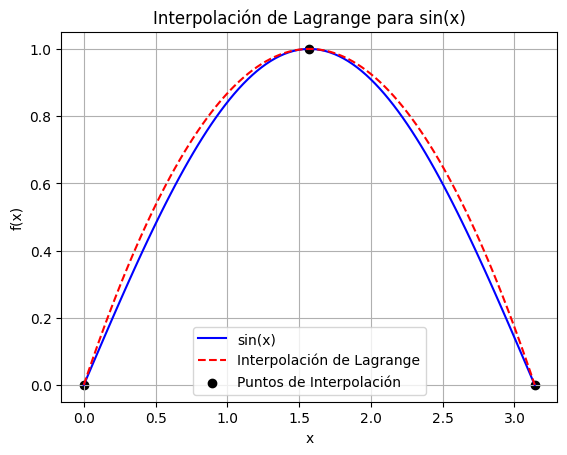

Polinomio de interpolación de Lagrange: -0.405284734569351*x**2 + 1.27323954473516*x
Expresión del error teórico: -x**3*cos(x)/6 + 0.785398163397448*x**2*cos(x) - 0.822467033424113*x*cos(x)


In [3]:
from sympy import symbols, expand, diff, sin

# Definir los puntos de interpolación
x_points = np.array([0, np.pi/2, np.pi])
y_points = np.sin(x_points)

# Construir el polinomio de interpolación de Lagrange
poly = lagrange(x_points, y_points)

# Expresión simbólica del polinomio
x = symbols('x')
lagrange_poly_expr = expand(sum(
    y_points[i] * np.prod([(x - x_points[j]) / (x_points[i] - x_points[j]) for j in range(len(x_points)) if j != i])
    for i in range(len(x_points))
))

# Calcular el error teórico
n = len(x_points) - 1
f_deriv = diff(sin(x), x, n+1)  # Derivada de orden n+1 de sin(x)
error_expr = (f_deriv / np.math.factorial(n+1)) * np.prod([(x - xi) for xi in x_points])
error_expr = expand(error_expr)

# Graficar la función original y la interpolación
x_vals = np.linspace(0, np.pi, 100)
y_vals = np.sin(x_vals)
y_interp = poly(x_vals)

plt.plot(x_vals, y_vals, label='sin(x)', color='blue')
plt.plot(x_vals, y_interp, '--', label='Interpolación de Lagrange', color='red')
plt.scatter(x_points, y_points, color='black', label='Puntos de Interpolación')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolación de Lagrange para sin(x)')
plt.grid()
plt.show()

# Mostrar resultados
print(f'Polinomio de interpolación de Lagrange: {lagrange_poly_expr}')
print(f'Expresión del error teórico: {error_expr}')


# 1b
Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

<ipython-input-12-65dac5b14bb3>:15: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  error_expr = (f_deriv / np.math.factorial(2*n+2)) * np.prod([(x - xi)**2 for xi in x_points])


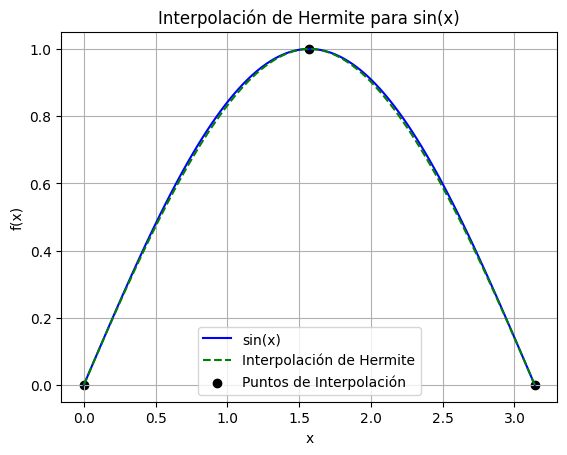

Expresión del error teórico: -0.00138888888888889*x**6*sin(x) + 0.0130899693899575*x**5*sin(x) - 0.0445502976438061*x**4*sin(x) + 0.0645964097506246*x**3*sin(x) - 0.0338226010534731*x**2*sin(x)


In [12]:
from sympy import symbols, expand, diff, sin

# Definir los puntos de interpolación
x_points = np.array([0, np.pi/2, np.pi])
y_points = np.sin(x_points)
dy_points = np.cos(x_points)  # Derivadas de sin(x)

# Construcción del polinomio de Hermite usando CubicSpline
hermite_interpolator = CubicSpline(x_points, y_points, bc_type= ((1, dy_points[0]), (1, dy_points[-1])))

# Expresión simbólica del error teórico
x = symbols('x')
n = len(x_points) - 1
f_deriv = diff(sin(x), x, 2*n+2)  # Derivada de orden 2n+2 de sin(x)
error_expr = (f_deriv / np.math.factorial(2*n+2)) * np.prod([(x - xi)**2 for xi in x_points])
error_expr = expand(error_expr)

# Graficar la función original y la interpolación de Hermite
x_vals = np.linspace(0, np.pi, 100)
y_vals = np.sin(x_vals)
y_interp = hermite_interpolator(x_vals)

plt.plot(x_vals, y_vals, label='sin(x)', color='blue')
plt.plot(x_vals, y_interp, '--', label='Interpolación de Hermite', color='green')
plt.scatter(x_points, y_points, color='black', label='Puntos de Interpolación')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolación de Hermite para sin(x)')
plt.grid()
plt.show()

# Mostrar resultados
print(f'Expresión del error teórico: {error_expr}')


# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el error asociado a cada uno de ellos. ¿Cuál será el mejor?

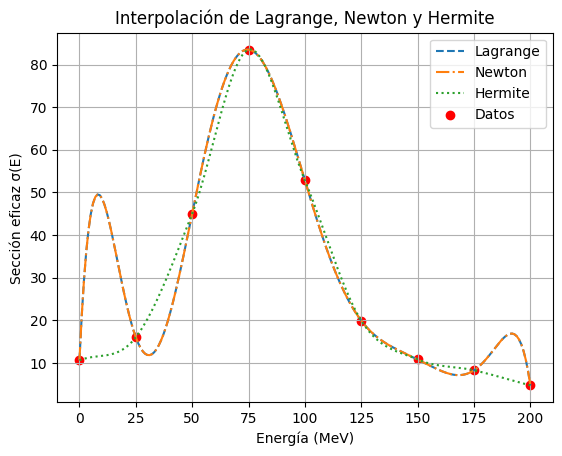

Error de Lagrange: [0. 0. 0. 0. 0. 0. 0. 0. 0.]
Error de Newton: [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.42108547e-14
 7.10542736e-15 3.55271368e-15 4.26325641e-14 1.11910481e-13
 5.99520433e-13]
Error de Hermite: [0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:

from sympy import symbols, expand, diff

# Datos del problema
energia = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
sigma_exp = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

# Interpolación de Lagrange
lagrange_interp = BarycentricInterpolator(energia, sigma_exp)

# Interpolación de Newton (usando diferencias divididas)
def newton_divided_diff(x, y):
    n = len(x)
    coef = np.copy(y).astype(float)
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            coef[i] = (coef[i] - coef[i - 1]) / (x[i] - x[i - j])
    return coef

def newton_interp(x, x_data, coef):
    n = len(x_data)
    result = coef[-1]
    for i in range(n - 2, -1, -1):
        result = result * (x - x_data[i]) + coef[i]
    return result

newton_coef = newton_divided_diff(energia, sigma_exp)

# Interpolación de Hermite (Aproximando derivadas numéricamente)
derivadas = np.gradient(sigma_exp, energia)
hermite_interp = CubicHermiteSpline(energia, sigma_exp, derivadas)

# Gráfica
x_vals = np.linspace(0, 200, 200)
lagrange_vals = lagrange_interp(x_vals)
newton_vals = newton_interp(x_vals, energia, newton_coef)
hermite_vals = hermite_interp(x_vals)

plt.plot(x_vals, lagrange_vals, '--', label='Lagrange')
plt.plot(x_vals, newton_vals, '-.', label='Newton')
plt.plot(x_vals, hermite_vals, ':', label='Hermite')
plt.scatter(energia, sigma_exp, color='red', label='Datos')
plt.xlabel('Energía (MeV)')
plt.ylabel('Sección eficaz σ(E)')
plt.legend()
plt.title('Interpolación de Lagrange, Newton y Hermite')
plt.grid()
plt.show()

# Cálculo del error
def error_real(f_interp, x_vals, y_real):
    return np.abs(y_real - f_interp(x_vals))

error_lagrange = error_real(lagrange_interp, energia, sigma_exp)
error_newton = error_real(lambda x: newton_interp(x, energia, newton_coef), energia, sigma_exp)
error_hermite = error_real(hermite_interp, energia, sigma_exp)

print(f'Error de Lagrange: {error_lagrange}')
print(f'Error de Newton: {error_newton}')
print(f'Error de Hermite: {error_hermite}')


#3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

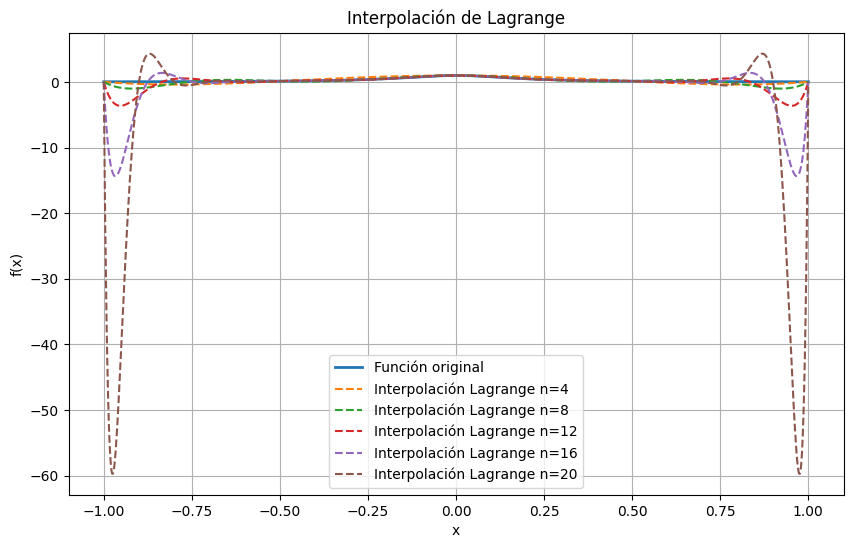

Error estimado en x=0.5 para n=4: 0


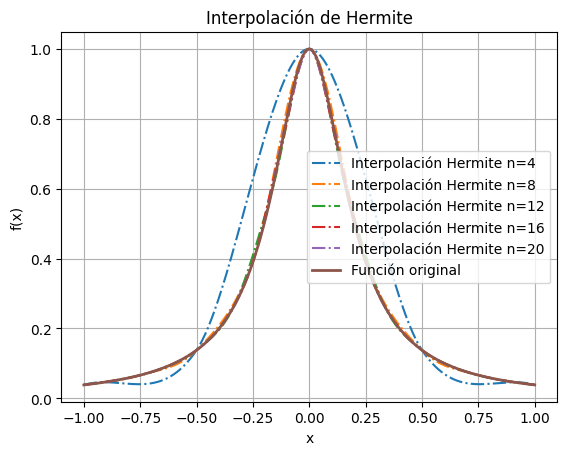

In [17]:

def f(x):
    return 1 / (1 + 25 * x**2)

# Intervalo
n_values = [4, 8, 12, 16, 20]
x_vals = np.linspace(-1, 1, 1000)
y_vals = f(x_vals)

# Grafica
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Función original', linewidth=2)

# Interpolación de Lagrange
for n in n_values:
    x_points = np.linspace(-1, 1, n + 1)
    y_points = f(x_points)

    lagrange_interp = BarycentricInterpolator(x_points, y_points)
    y_interp = lagrange_interp(x_vals)

    plt.plot(x_vals, y_interp, linestyle='--', label=f'Interpolación Lagrange n={n}')

plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolación de Lagrange')
plt.grid()
plt.show()

# Estimación del error para n = 4 en x = 0.5
n = 4
x_points = np.linspace(-1, 1, n + 1)
y_points = f(x_points)

x_sym = sp.Symbol('x')
lagrange_poly = sum(y_points[i] * sp.prod([(x_sym - x_points[j]) / (x_points[i] - x_points[j]) for j in range(n+1) if j != i]) for i in range(n+1))
error_cota = sp.diff(f(x_sym), x_sym, n+1).subs(x_sym, 0.5) / sp.factorial(n+1) * sp.prod([(0.5 - x_points[i]) for i in range(n+1)])

print(f'Error estimado en x=0.5 para n={n}:', error_cota.evalf())

# Interpolación de Hermite
for n in n_values:
    x_points = np.linspace(-1, 1, n + 1)
    y_points = f(x_points)
    dy_points = np.gradient(y_points, x_points)  # Aproximar derivadas

    hermite_interp = CubicHermiteSpline(x_points, y_points, dy_points)
    y_hermite = hermite_interp(x_vals)

    plt.plot(x_vals, y_hermite, linestyle='-.', label=f'Interpolación Hermite n={n}')

plt.plot(x_vals, y_vals, label='Función original', linewidth=2)
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolación de Hermite')
plt.grid()
plt.show()


# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato.

3. Representar el polinomio de interpolación de Lagrange y de Hermite en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?



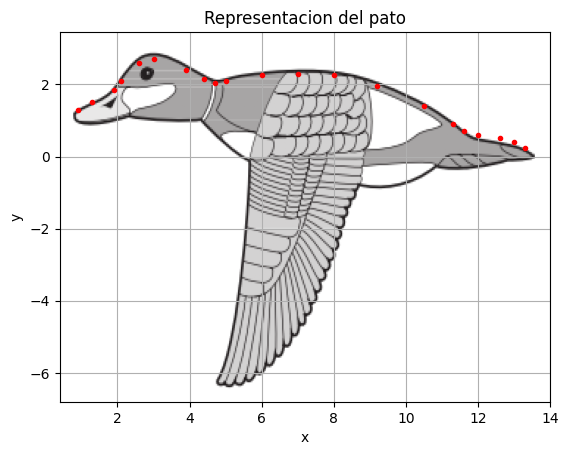

In [19]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

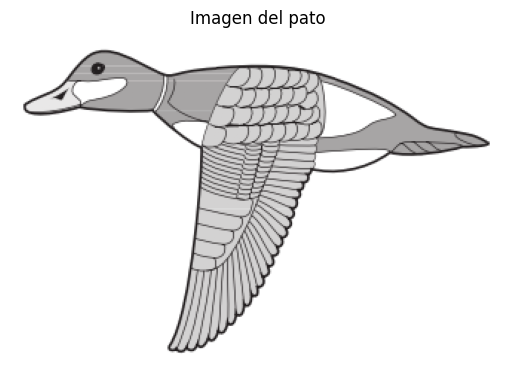

In [21]:
#MI CODIGO, aunque se debe ejecutar el anterior
#1

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar la imagen
imagen_pato = mpimg.imread('pato.jpg')

# Mostrar la imagen
plt.figure()
plt.title('Imagen del pato')
plt.imshow(imagen_pato)
plt.axis('off')  # Ocultar ejes
plt.show()


In [22]:
#2
# Definir puntos del contorno del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]


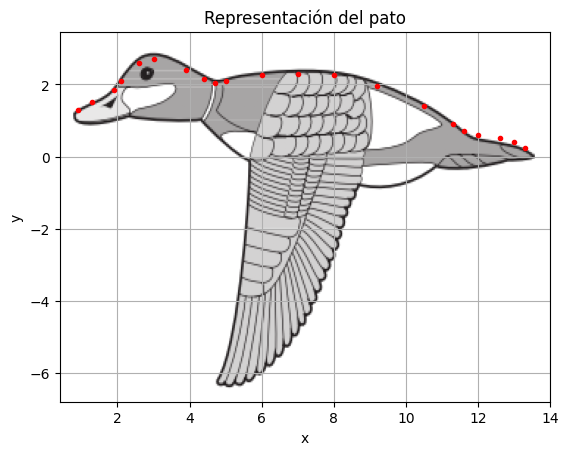

In [23]:
#2
# Mostrar imagen con los puntos superpuestos
plt.figure()
plt.title('Representación del pato')
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))  # Ajuste de los píxeles
plt.plot(xp, yp, '.r')  # Puntos en rojo
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


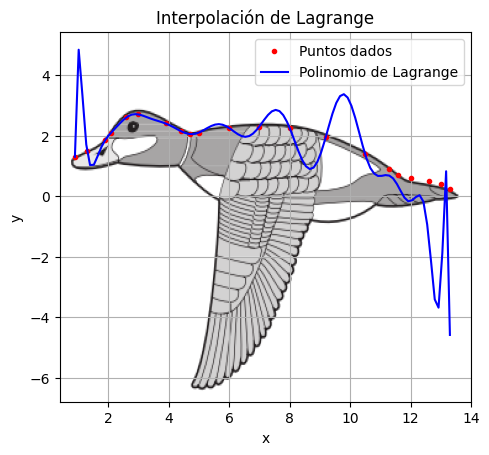

In [25]:
#3
import numpy as np
from scipy.interpolate import lagrange

# Generar el polinomio de interpolación de Lagrange
polinomio_lagrange = lagrange(xp, yp)

# Crear valores interpolados
x_interp = np.linspace(min(xp), max(xp), 100)
y_interp = polinomio_lagrange(x_interp)

# Graficar la interpolación
plt.figure()
plt.title('Interpolación de Lagrange')
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, '.r', label='Puntos dados')
plt.plot(x_interp, y_interp, '-b', label='Polinomio de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


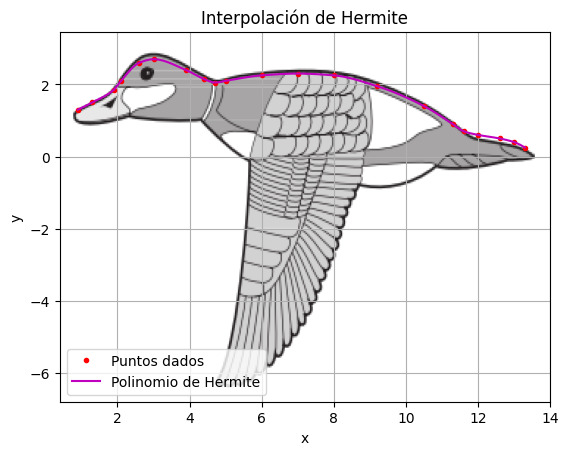

In [28]:
#3
from scipy.interpolate import PchipInterpolator

# Generar interpolación con Hermite (PCHIP: Piecewise Cubic Hermite Interpolating Polynomial)
hermite_interp = PchipInterpolator(xp, yp)

# Crear valores interpolados
y_hermite = hermite_interp(x_interp)

# Graficar la interpolación de Hermite
plt.figure()
plt.title('Interpolación de Hermite')
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, '.r', label='Puntos dados')
plt.plot(x_interp, y_hermite, '-m', label='Polinomio de Hermite')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


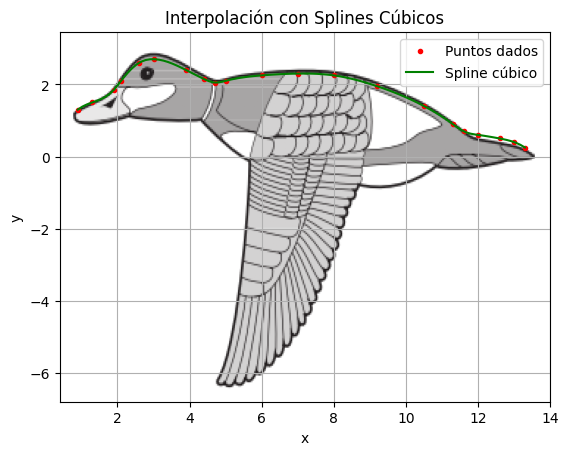

In [26]:
#4
from scipy.interpolate import CubicSpline

# Generar interpolación con splines cúbicos
spline_cubico = CubicSpline(xp, yp)

# Crear valores interpolados
y_spline = spline_cubico(x_interp)

# Graficar la interpolación con splines cúbicos
plt.figure()
plt.title('Interpolación con Splines Cúbicos')
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, '.r', label='Puntos dados')
plt.plot(x_interp, y_spline, '-g', label='Spline cúbico')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


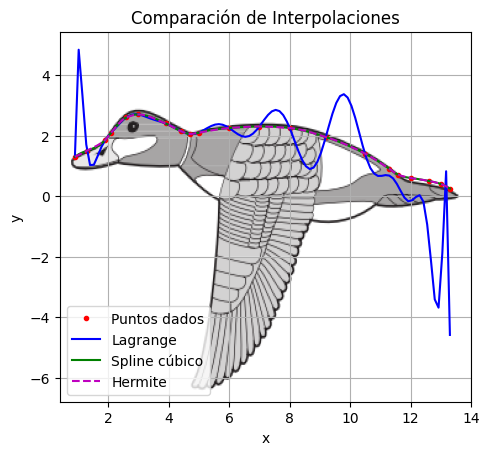

In [32]:
#5
plt.figure()
plt.title('Comparación de Interpolaciones')
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, '.r', label='Puntos dados')
plt.plot(x_interp, y_interp, '-b', label='Lagrange')
plt.plot(x_interp, y_spline, '-g', label='Spline cúbico')
plt.plot(x_interp, y_hermite, '--m', label='Hermite')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


Lagrange oscila porque es un polinomio de alto grado tratando de ajustarse a todos los puntos de forma global, mientras que los splines cúbicos y Hermite interpolan por partes, evitando oscilaciones.